# Analysis

This notebook analyze the result of DNC. The analysis includes plotting out results, visualizing model behavior, etc.

## Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score, balanced_accuracy_score, precision_score, recall_score, f1_score

## Result plots

In [4]:
# file_name = 'results_0313_FAULTS.csv'
file_name = 'results_0317_MPMC.csv'
dataset = file_name.split("_")[-1][:-4]

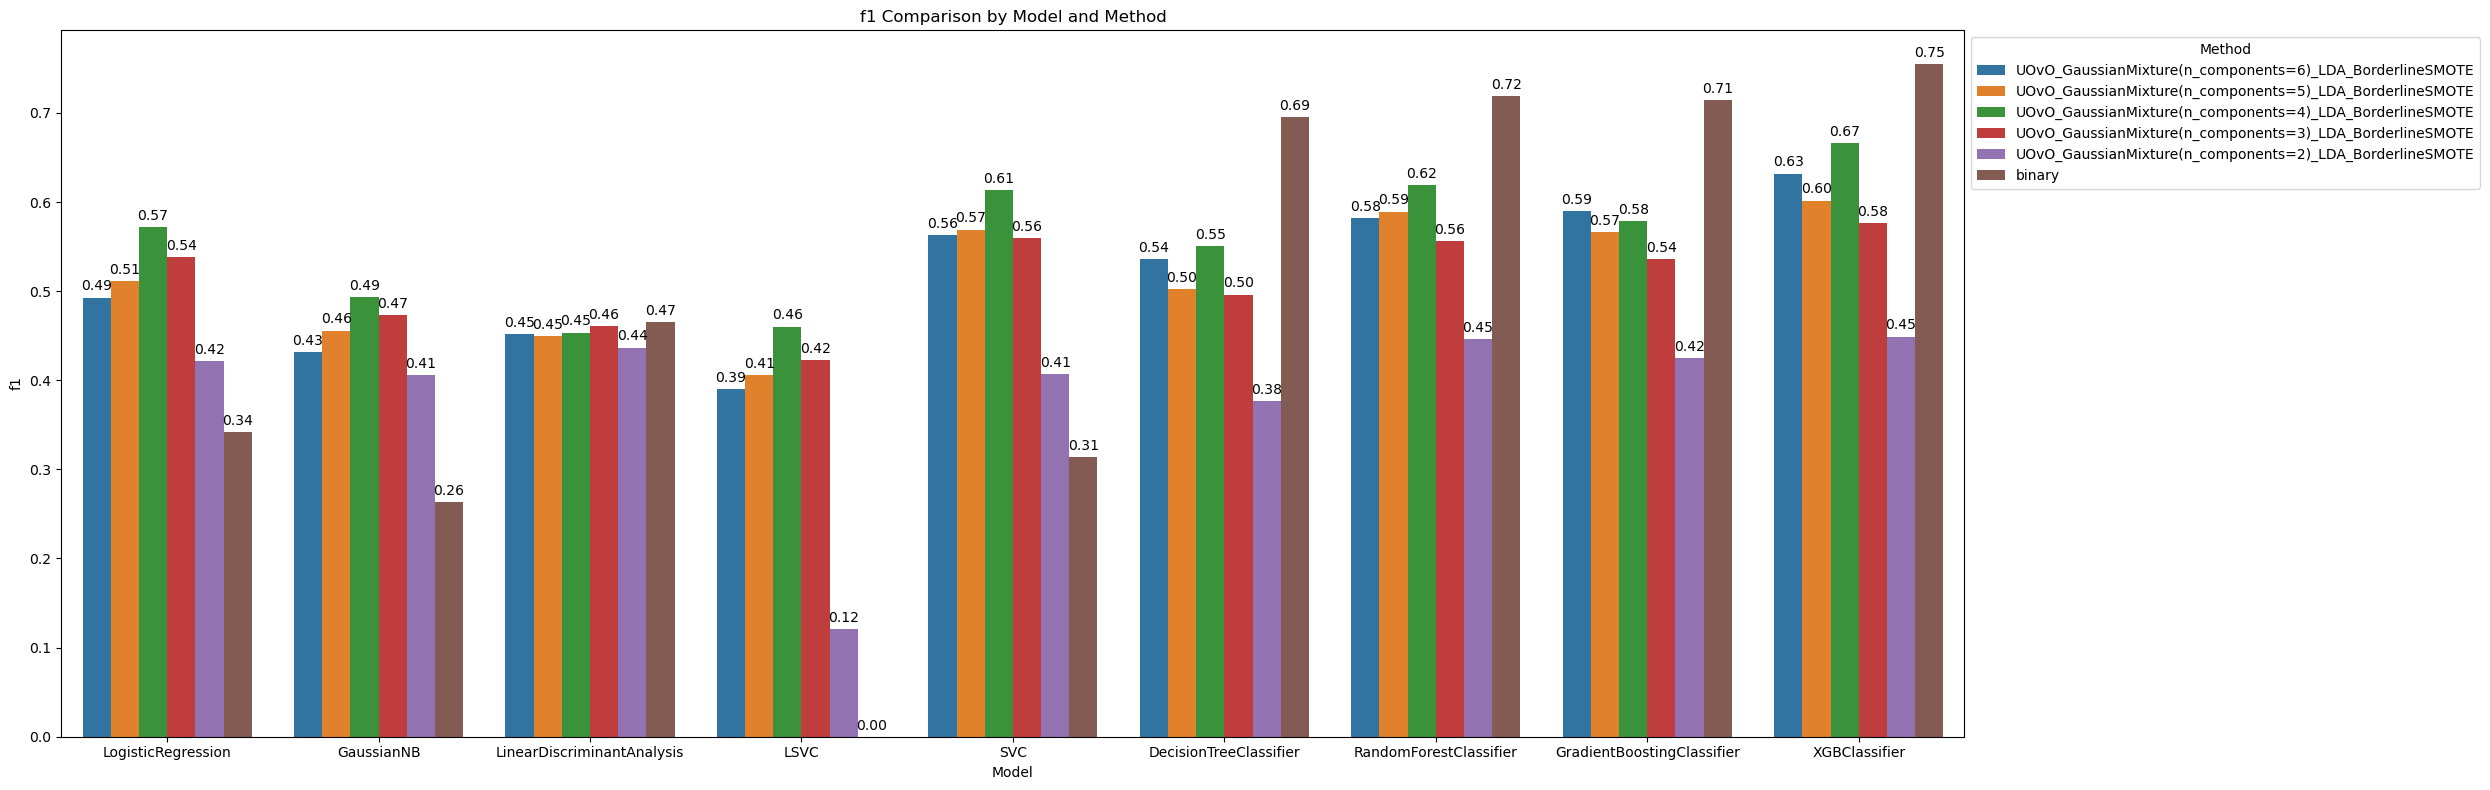

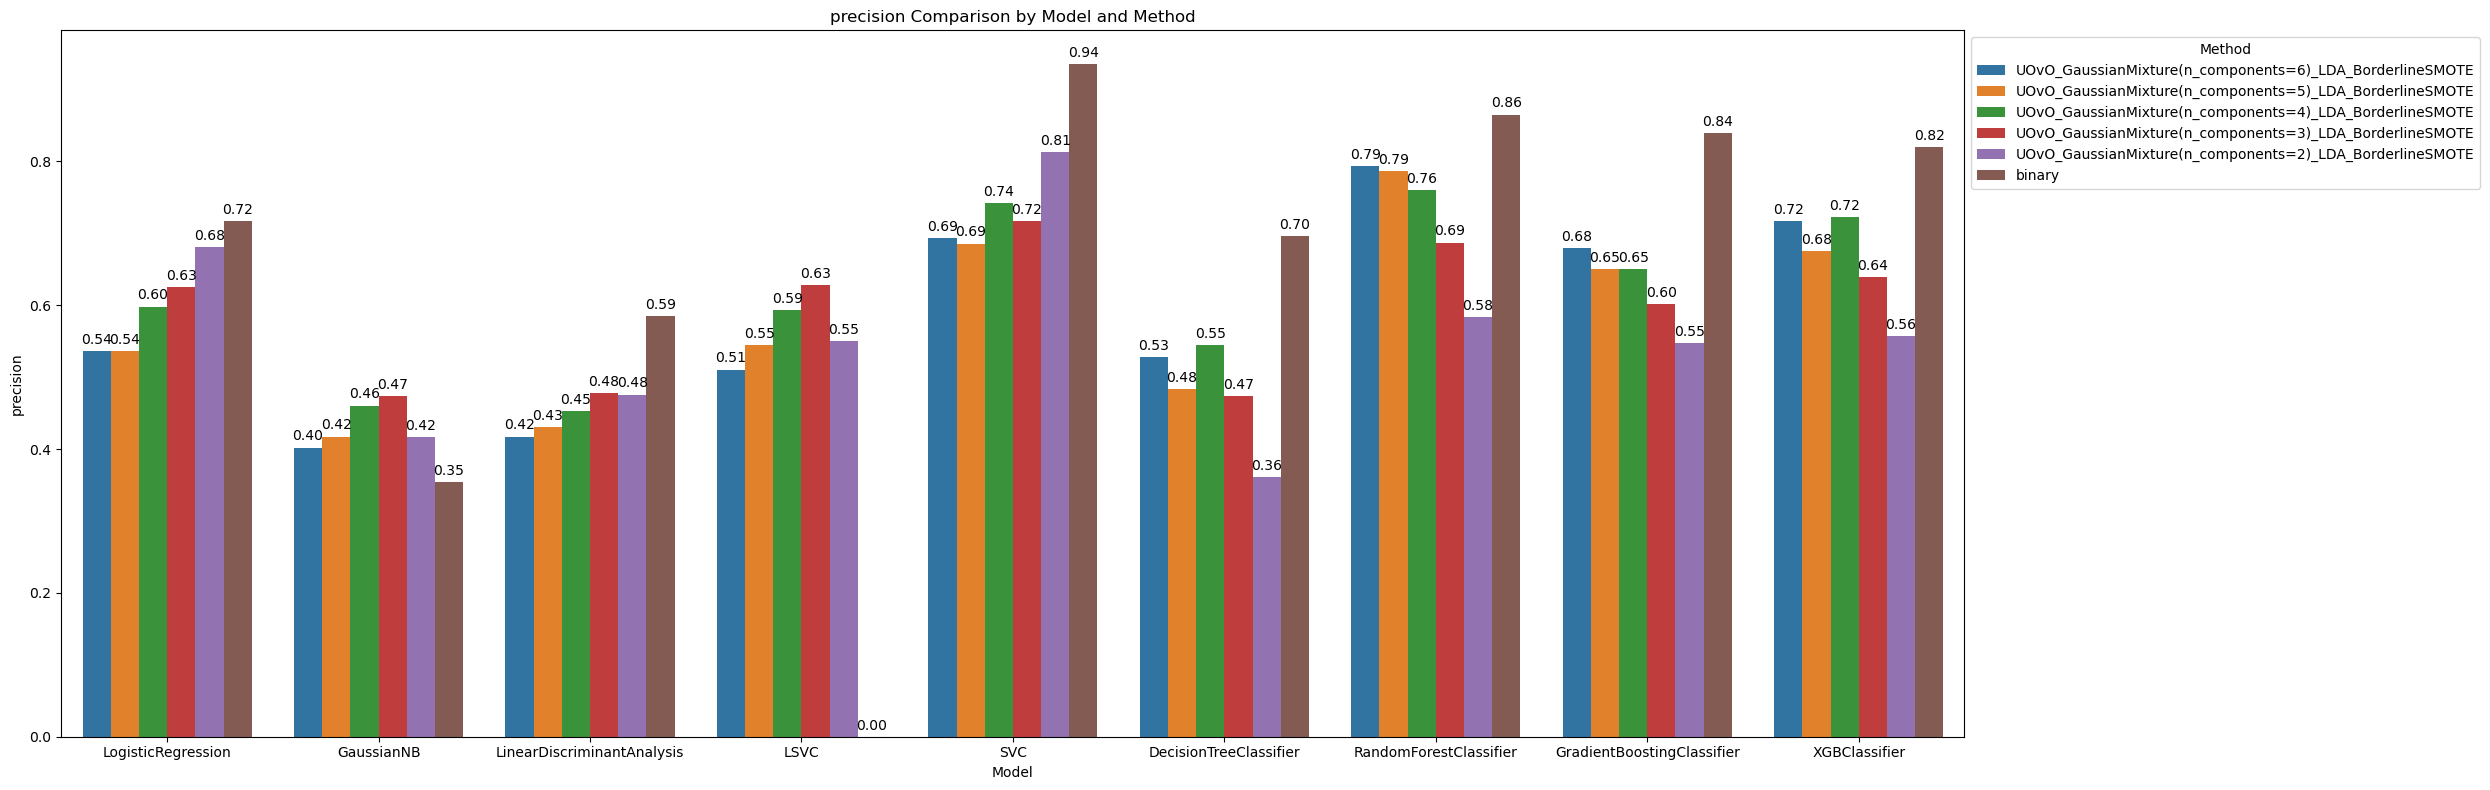

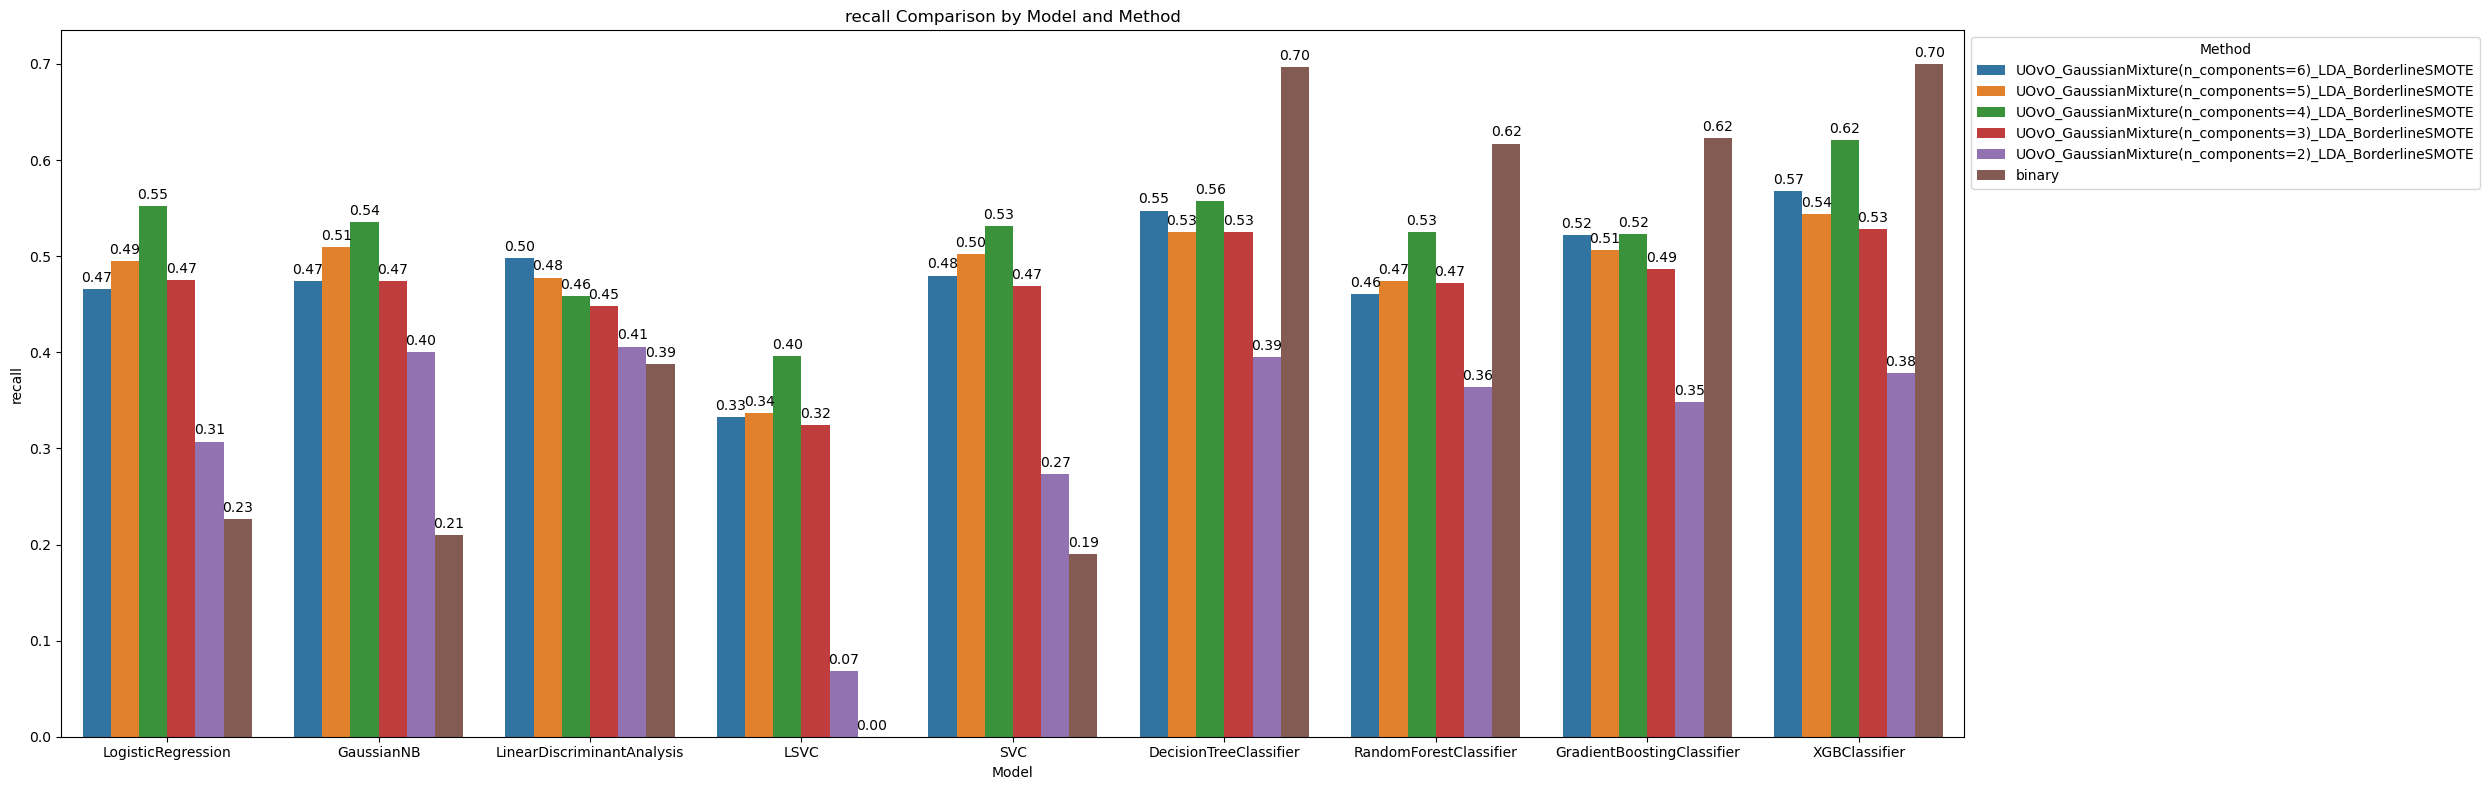

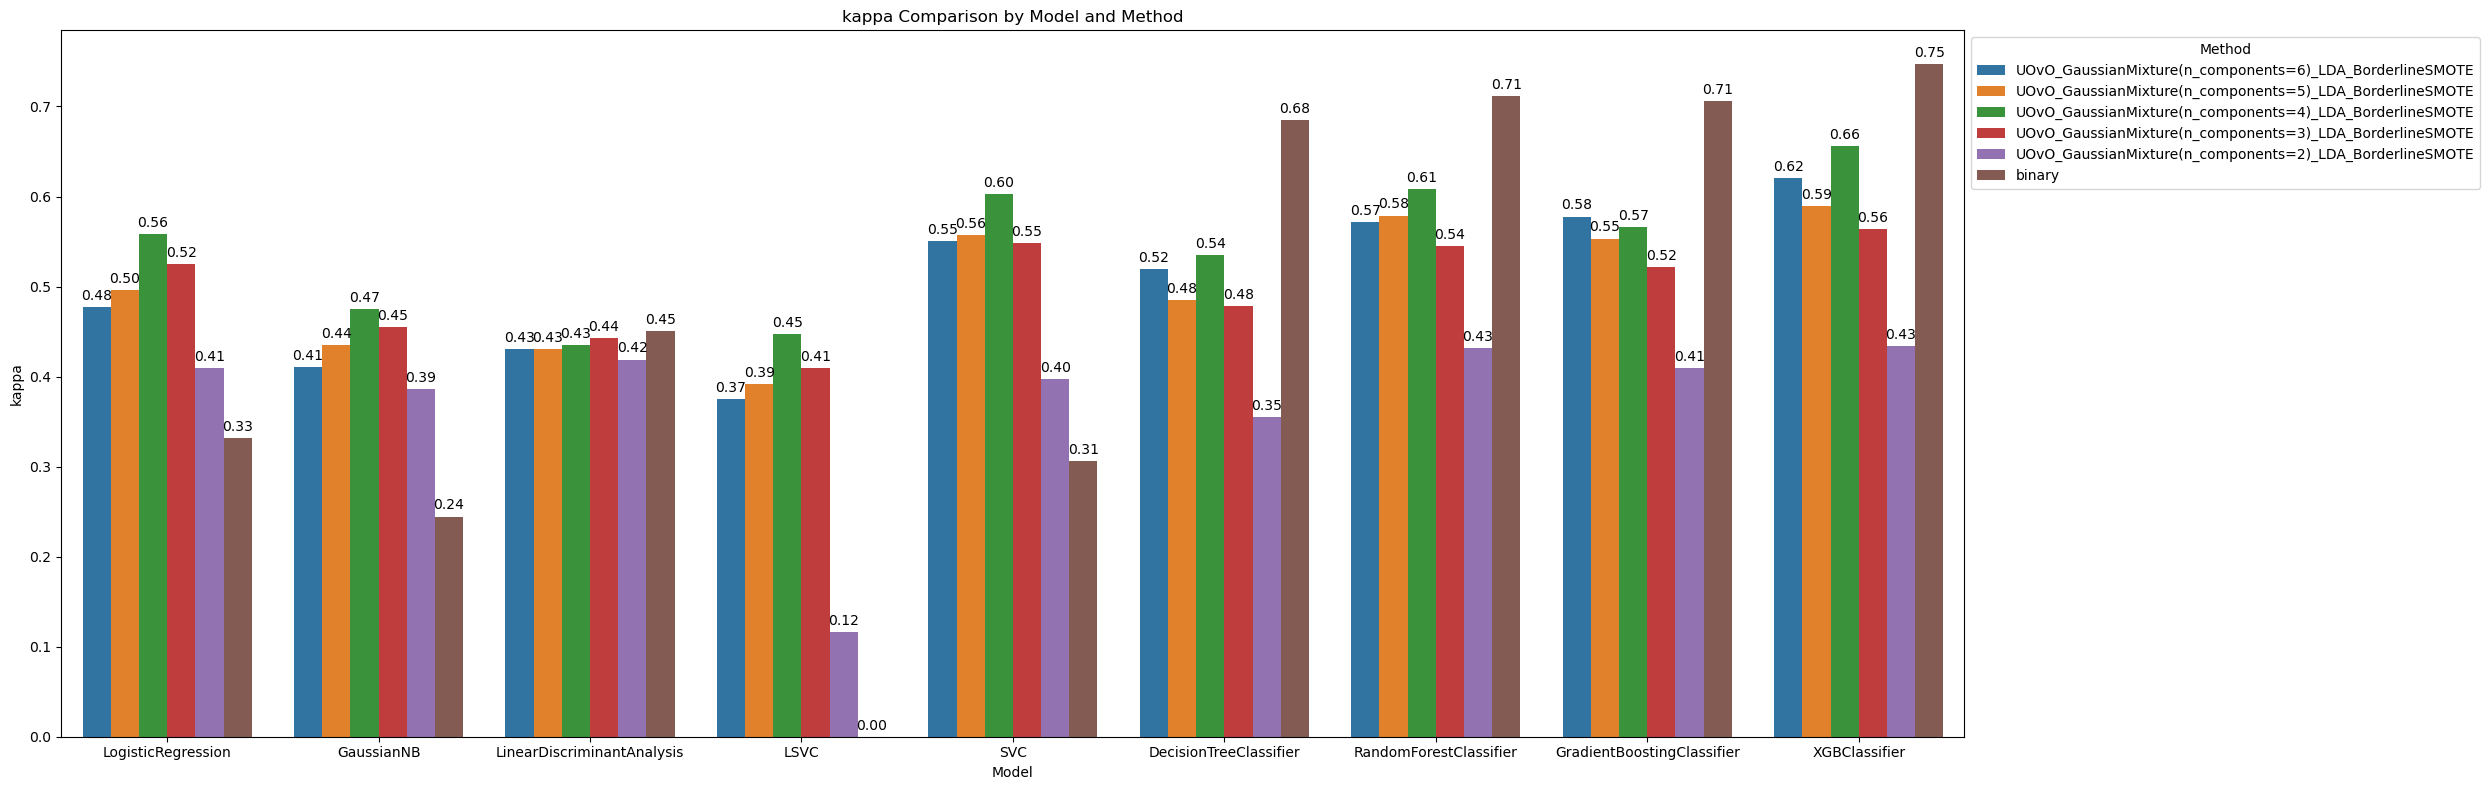

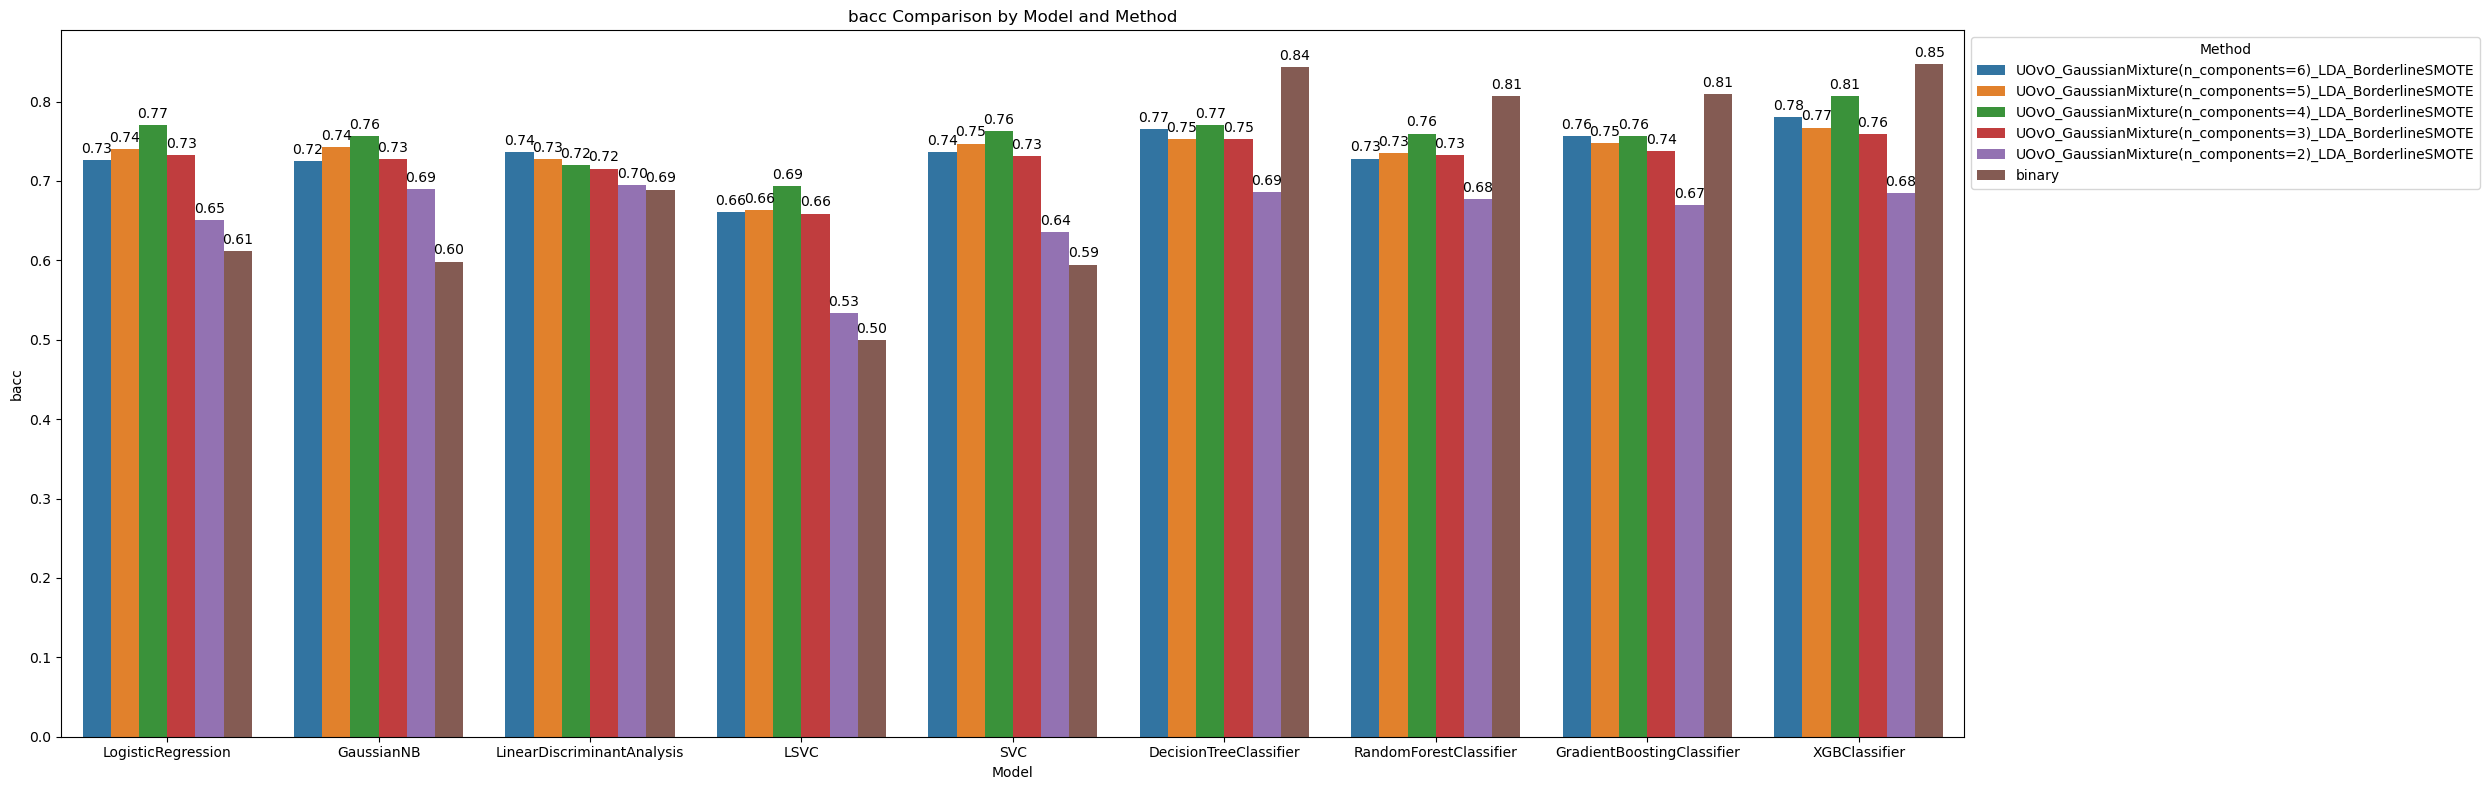

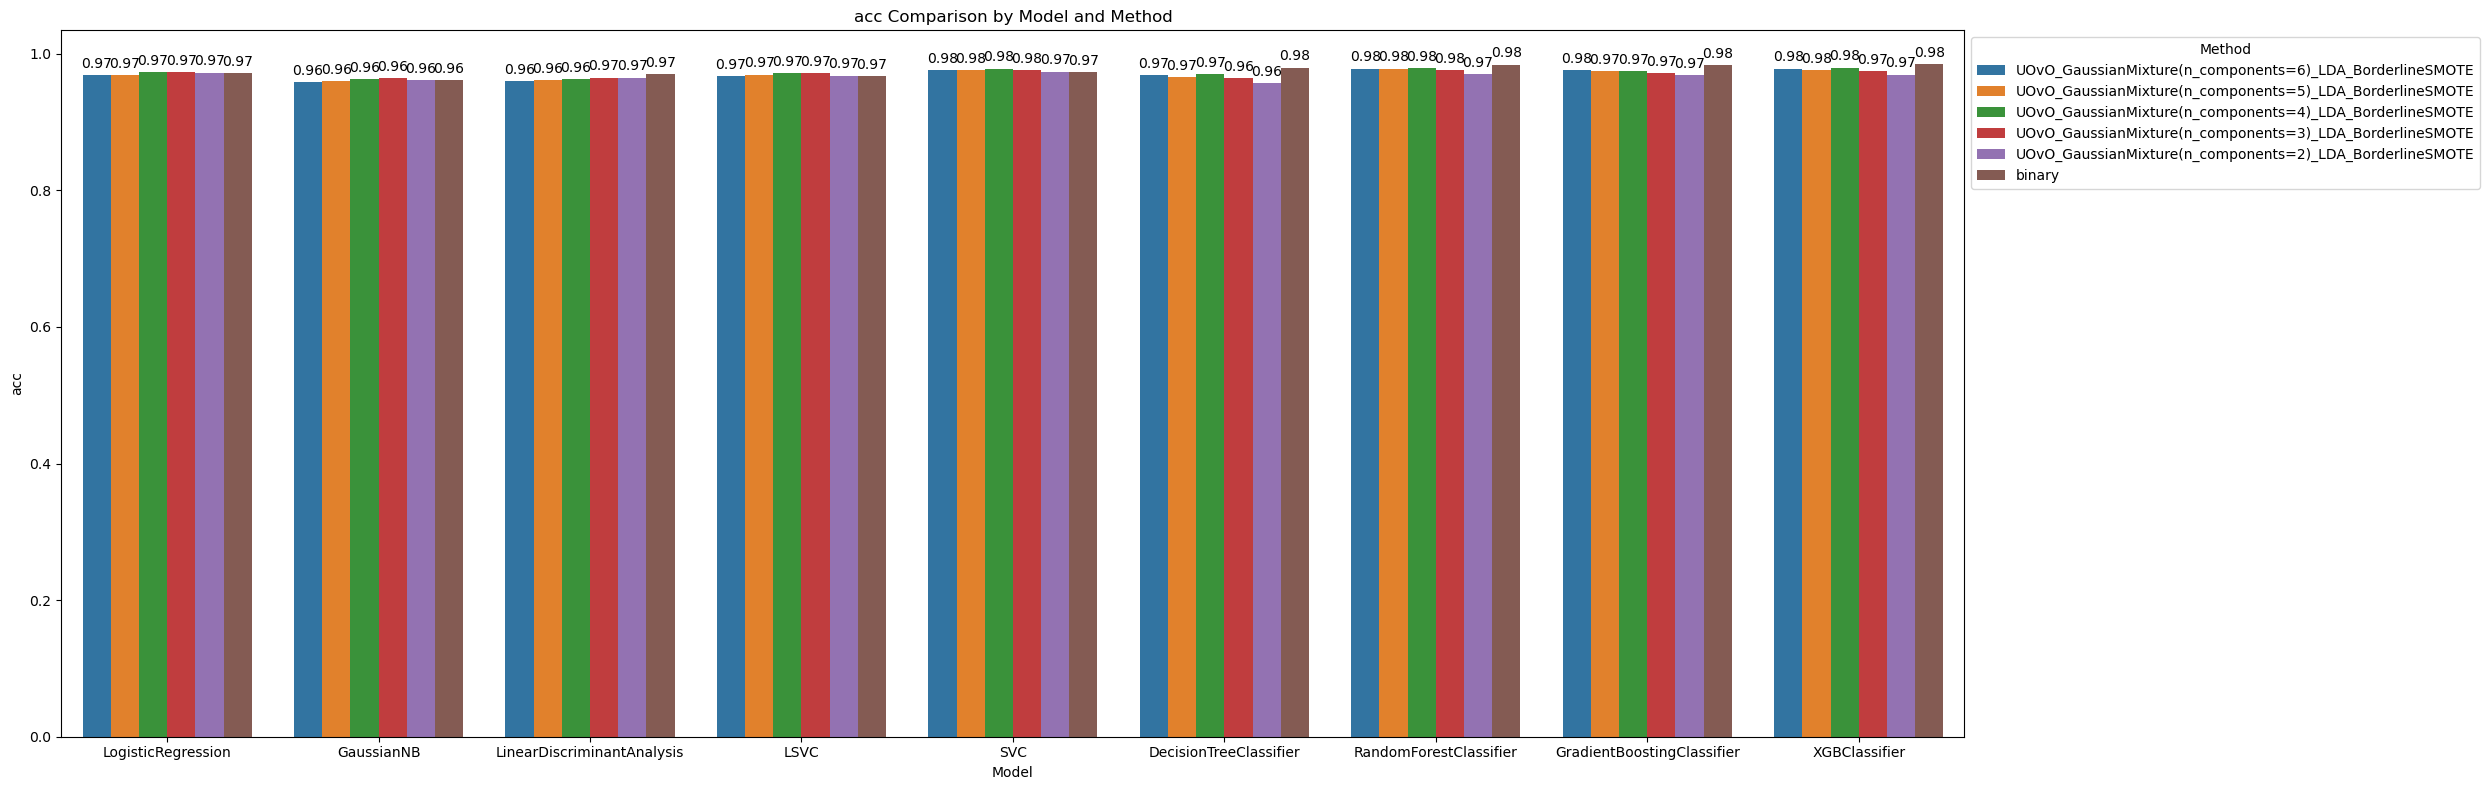

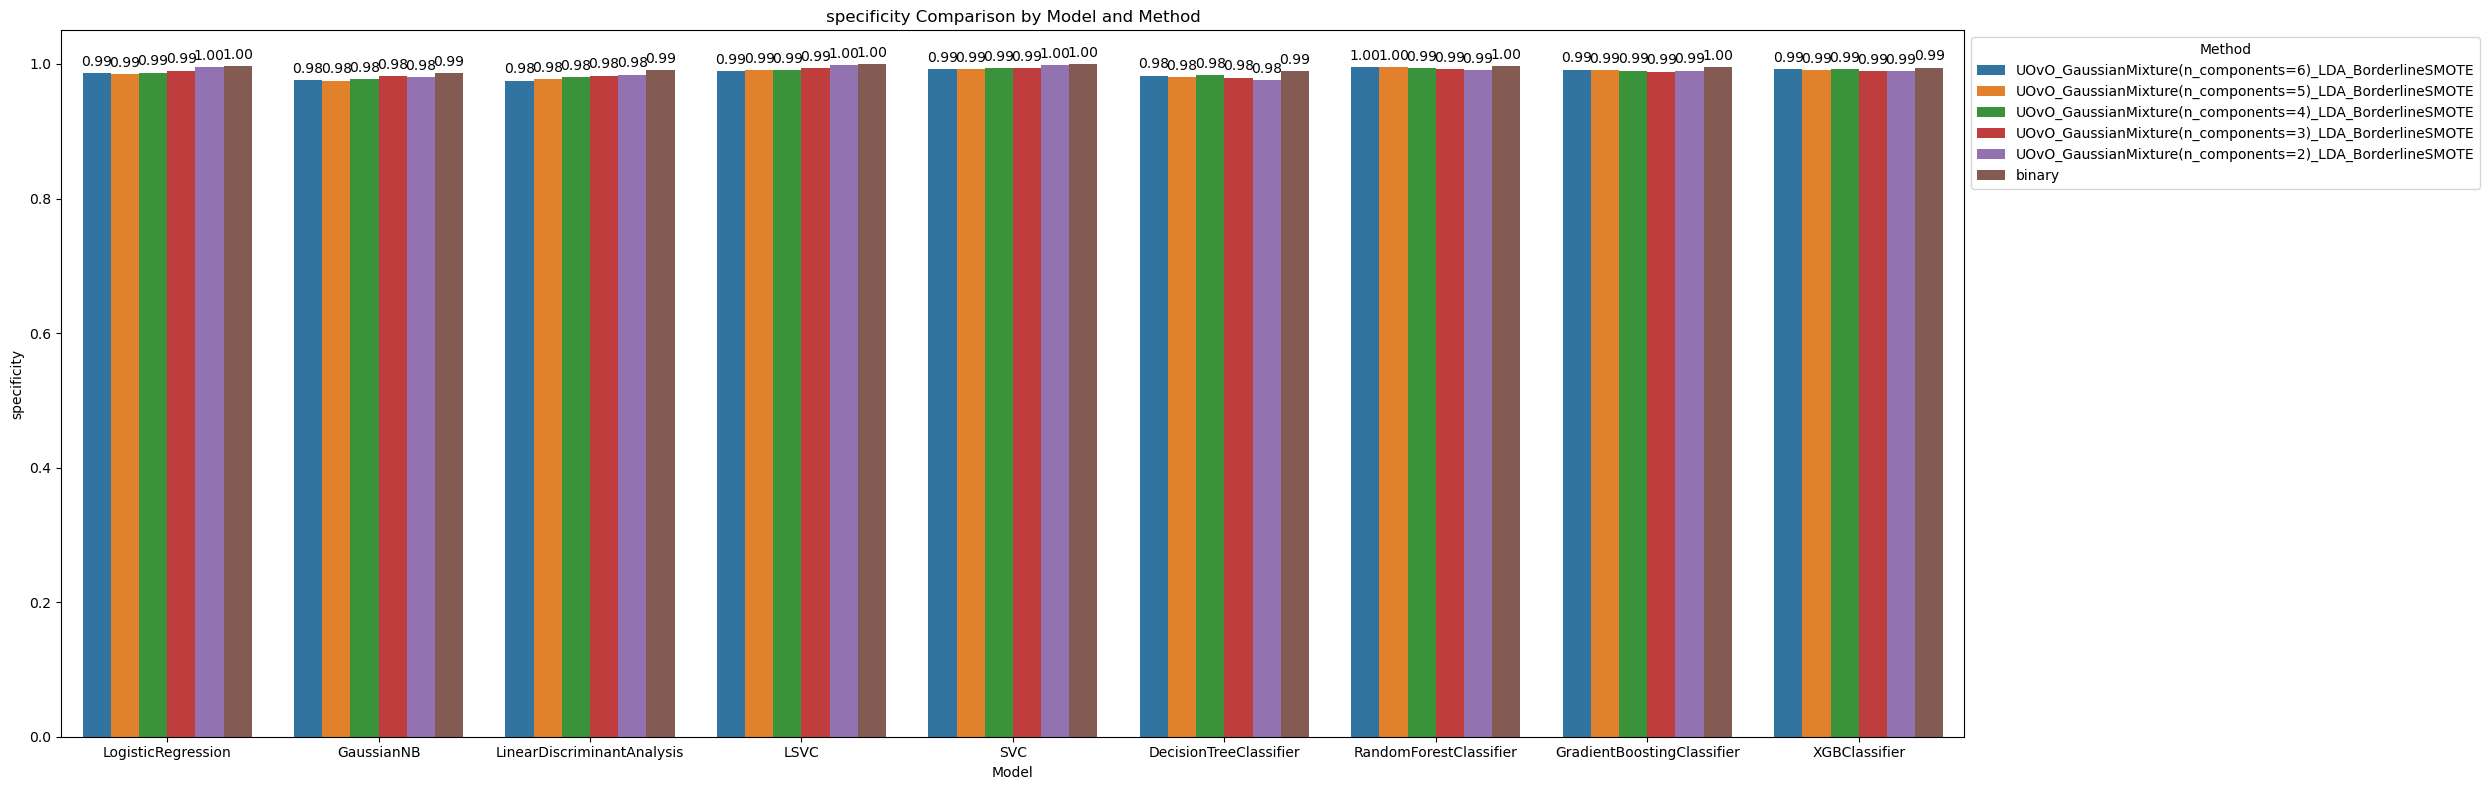

In [5]:
df = pd.read_csv(file_name)

df['model'] = [md.split('(')[0] for md in df['model']]
methods = df['method'].unique()
metrics = [col for col in df.columns if col in ['f1', 'precision', 'recall', 'bacc', 'kappa', 'acc', 'specificity']]

for metric in metrics:
    plt.figure(figsize=(25, 8))
    ax = sns.barplot(data=df, x="model", y=metric, hue="method", ci=None, dodge=True)

    # Annotate bars with their values
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", padding=3)

    # Labels and title
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison by Model and Method")
    plt.legend(title="Method", bbox_to_anchor=(1, 1) )
    plt.tight_layout()

    # Show plot
    plt.savefig(f"{metric}_comparison_{dataset}.png")
#     break

## Decision boundary

## Relationship between SMOTE and Performance